In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
#read data
df = pd.read_csv('clean_data.txt', encoding='utf-8')
df_team = pd.read_csv('team_data.txt', sep='\t')

df.head(20)

,Player,Squad,Age,Pos,Apps,Mins,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,Rating
0,1Ignacio Fernandez,River Plate,30,M(CR),18,1570,2.2,0.8,1.2,-,0.8,2.8,0.1,-,7.66
1,2Nicolas Gimenez,Arsenal Sarandi,24,AM(C),21(1),1697,1.3,0.5,0.7,-,0.3,1.3,0.1,-,7.48
2,3Marcelino Moreno,Lanus,26,AM(CLR),20,1705,1.8,0.6,1.4,-,0.2,1.1,0.1,-,7.43
3,4Miguel Barbieri,Rosario Central,26,D(C),11,972,1.5,2.8,1.5,0.5,6.5,0.3,1.5,-,7.37
4,5Carlos Tevez,Boca Juniors,36,FW,11(6),1056,0.5,0.1,0.9,-,0.1,0.6,-,-,7.34
5,6Enzo Diaz,Talleres,24,D(L),15,1306,4.2,1.7,2.3,0.2,1.1,1.3,0.2,-,7.33
6,7Eduardo Salvio,Boca Juniors,30,M(CR),12(5),1112,0.6,0.3,0.9,-,0.2,1.1,-,-,7.31
7,8Nicolas De La Cruz,River Plate,23,AM(C),16(1),1347,1.6,0.2,1.2,-,0.1,1.3,0.1,-,7.29
8,9Yeimar Gomez,Union,28,D(C),15,1350,1.7,2.8,0.9,0.5,6.9,0.7,0.9,-,7.28
9,10Rafael Delgado,Defensa y Justicia,30,D(CL),16,1434,1.4,1.1,0.9,0.1,2.3,1.1,0.3,-,7.27


In [22]:
df_team

,Team,P,W,D,L,GF,GA,GD,Pts,Form
0,1Boca Juniors,23,14,6,3,35,8,27,48,WWWWWW
1,2River Plate,23,14,5,4,41,18,23,47,WWWWDD
2,3Velez Sarsfield,23,11,6,6,27,14,13,39,DLWWLW
3,4Racing Club,23,9,12,2,28,23,5,39,DWDWDW
4,5Argentinos Juniors,23,10,9,4,22,17,5,39,DDWDLW
5,6Defensa y Justicia,23,10,6,7,26,18,8,36,DDWWDW
6,7Lanus,23,9,9,5,32,29,3,36,WDDDDL
7,8San Lorenzo,23,11,3,9,32,30,2,36,LWLLWW
8,9Rosario Central,23,9,9,5,31,29,2,36,LDWLWL
9,10Newell's Old Boys,23,9,8,6,33,25,8,35,WDDWDL


In [23]:
#check for na values
print(df.isna().sum())
print(50*'#')
print(df_team.isna().sum())

Player      0
Squad       0
Age         0
Pos         0
Apps        0
Mins        0
Tackles     0
Inter       0
Fouls       0
Offsides    0
Clear       0
Drb         0
Blocks      0
OwnG        0
Rating      0
dtype: int64
##################################################
Team    0
P       0
W       0
D       0
L       0
GF      0
GA      0
GD      0
Pts     0
Form    0
dtype: int64


In [24]:
#replace all '-' values
df.replace(to_replace='-',value=0,inplace=True)

#convert values to float
df = df.astype({'Tackles': float, 'Inter': float,'Fouls': float, 'Offsides': float, 'Clear': float, 'Drb': float, 'Blocks': float, 'OwnG': float, 'Rating': float})

#clean players names and position
for i in range(0,4):
    df['Player'] = df['Player'].map(lambda x: x.strip('0').strip('1').strip('2').strip('3').strip('4').strip('5').strip('6').strip('7').strip('8').strip('9'))

df['Pos'] = df['Pos'].str.replace(' ','')

df

,Player,Squad,Age,Pos,Apps,Mins,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,Rating
0,Ignacio Fernandez,River Plate,30,M(CR),18,1570,2.2,0.8,1.2,0.0,0.8,2.8,0.1,0.0,7.66
1,Nicolas Gimenez,Arsenal Sarandi,24,AM(C),21(1),1697,1.3,0.5,0.7,0.0,0.3,1.3,0.1,0.0,7.48
2,Marcelino Moreno,Lanus,26,AM(CLR),20,1705,1.8,0.6,1.4,0.0,0.2,1.1,0.1,0.0,7.43
3,Miguel Barbieri,Rosario Central,26,D(C),11,972,1.5,2.8,1.5,0.5,6.5,0.3,1.5,0.0,7.37
4,Carlos Tevez,Boca Juniors,36,FW,11(6),1056,0.5,0.1,0.9,0.0,0.1,0.6,0.0,0.0,7.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,Braian Ojeda,Defensa y Justicia,20,M(C),2(8),268,0.6,0.0,0.5,0.0,0.2,0.7,0.0,0.0,6.20
362,Nicolas Orsini,Lanus,25,FW,0(20),276,0.1,0.1,0.6,0.1,0.4,0.0,0.0,0.0,6.19
363,Joaquin Varela,Godoy Cruz,23,D(C),10(3),785,0.9,1.0,0.9,0.4,4.4,0.5,0.5,0.0,6.18
364,Ezequiel Cerica,Arsenal Sarandi,33,FW,2(9),312,0.2,0.0,0.5,0.0,0.3,0.5,0.0,0.0,6.10


In [25]:
#clean squads name 
for i in range(0,3):
    df_team['Team'] = df_team['Team'].map(lambda x: x.strip('0').strip('1').strip('2').strip('3').strip('4').strip('5').strip('6').strip('7').strip('8').strip('9'))

#sort by team name
df_team = df_team.sort_values(by='Team')

#rename column teams to squad in order to merge with main dataframe (df)
df_team.rename(columns={'Team':'Squad'}, inplace=True)

#goals againts dataframe
df_GA = df_team[['Squad','GA']]

df_GA

,Squad,GA
21,Aldosivi,35
4,Argentinos Juniors,17
10,Arsenal Sarandi,32
14,Atletico Tucuman,25
16,Banfield,23
0,Boca Juniors,8
17,Central Cordoba de Santiago,29
22,Colon,39
5,Defensa y Justicia,18
12,Estudiantes,22


In [26]:
#add possession values of each team in order to adjust defensive actions 
pos = [50.3,50.3,50.1,45.8,46.6,51.7,43.8,42.6,56.8,53.3,45.7,38.5,42.9,56.1,52.0,52.1,41.5,60.0,60.1,50.0,51.0,55.0,45.2,59.7]

#get squad names to assign each possession value
squad = df['Squad'].unique()
squad = np.sort(squad)

#create a dataframe with new values
possession = pd.DataFrame(pos, dtype='float')

#add squad list to new dataframe
possession['Squad'] = squad

possession.rename(columns={0:'Possession'}, inplace=True)

possession

,Possession,Squad
0,50.3,Aldosivi
1,50.3,Argentinos Juniors
2,50.1,Arsenal Sarandi
3,45.8,Atletico Tucuman
4,46.6,Banfield
5,51.7,Boca Juniors
6,43.8,Central Cordoba de Santiago
7,42.6,Colon
8,56.8,Defensa y Justicia
9,53.3,Estudiantes


In [27]:
#merge by squad the possession and GA dataframes with the main datafreme 
df = pd.merge(df,possession, on='Squad')
df = pd.merge(df,df_GA, on='Squad')

df

,Player,Squad,Age,Pos,Apps,Mins,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,Rating,Possession,GA
0,Ignacio Fernandez,River Plate,30,M(CR),18,1570,2.2,0.8,1.2,0.0,0.8,2.8,0.1,0.0,7.66,60.1,18
1,Nicolas De La Cruz,River Plate,23,AM(C),16(1),1347,1.6,0.2,1.2,0.0,0.1,1.3,0.1,0.0,7.29,60.1,18
2,Robert Rojas,River Plate,24,D(C),13,1170,2.5,1.1,1.0,0.8,4.3,0.2,0.8,0.0,7.19,60.1,18
3,Santos Borre,River Plate,24,FW,18(2),1373,1.0,0.3,1.0,0.1,0.4,0.9,0.1,0.0,7.10,60.1,18
4,Enzo Perez,River Plate,34,M(CR),18,1535,2.4,1.4,1.9,0.2,1.5,0.7,0.2,0.0,7.07,60.1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,Emanuel Olivera,Colon,30,D(C),19,1710,1.1,1.3,1.4,0.5,6.2,1.0,0.5,0.0,6.54,42.6,39
362,Leonardo Burian,Colon,36,GK,22,1980,0.0,0.1,0.0,0.0,0.5,0.0,0.0,0.0,6.46,42.6,39
363,Wilson Morelo,Colon,33,FW,14(6),1230,0.2,0.3,0.8,0.0,0.1,0.4,0.0,0.0,6.42,42.6,39
364,Tomas Chancalay,Colon,21,FW,8(9),804,0.9,0.3,1.0,0.0,0.1,0.6,0.1,0.0,6.33,42.6,39


In [28]:
#create new columns in order to adjust for defensive actions
df['Int+Tack'] = df['Inter']+df['Tackles']
df['Pos_sig'] = 1 + np.exp(-0.1*(df['Possession']-50))
df['Tackles_sig'] = (2 * df['Tackles'])/df['Pos_sig']
df['Int_sig'] = (2 * df['Inter'])/df['Pos_sig']
df['Int+Tack_sig'] = (2 * df['Int+Tack'])/df['Pos_sig']

df

,Player,Squad,Age,Pos,Apps,Mins,Tackles,Inter,Fouls,Offsides,...,Blocks,OwnG,Rating,Possession,GA,Int+Tack,Pos_sig,Tackles_sig,Int_sig,Int+Tack_sig
0,Ignacio Fernandez,River Plate,30,M(CR),18,1570,2.2,0.8,1.2,0.0,...,0.1,0.0,7.66,60.1,18,3.0,1.364219,3.225289,1.172832,4.398121
1,Nicolas De La Cruz,River Plate,23,AM(C),16(1),1347,1.6,0.2,1.2,0.0,...,0.1,0.0,7.29,60.1,18,1.8,1.364219,2.345664,0.293208,2.638873
2,Robert Rojas,River Plate,24,D(C),13,1170,2.5,1.1,1.0,0.8,...,0.8,0.0,7.19,60.1,18,3.6,1.364219,3.665101,1.612644,5.277745
3,Santos Borre,River Plate,24,FW,18(2),1373,1.0,0.3,1.0,0.1,...,0.1,0.0,7.10,60.1,18,1.3,1.364219,1.466040,0.439812,1.905852
4,Enzo Perez,River Plate,34,M(CR),18,1535,2.4,1.4,1.9,0.2,...,0.2,0.0,7.07,60.1,18,3.8,1.364219,3.518497,2.052456,5.570953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,Emanuel Olivera,Colon,30,D(C),19,1710,1.1,1.3,1.4,0.5,...,0.5,0.0,6.54,42.6,39,2.4,3.095936,0.710609,0.839811,1.550420
362,Leonardo Burian,Colon,36,GK,22,1980,0.0,0.1,0.0,0.0,...,0.0,0.0,6.46,42.6,39,0.1,3.095936,0.000000,0.064601,0.064601
363,Wilson Morelo,Colon,33,FW,14(6),1230,0.2,0.3,0.8,0.0,...,0.0,0.0,6.42,42.6,39,0.5,3.095936,0.129202,0.193802,0.323004
364,Tomas Chancalay,Colon,21,FW,8(9),804,0.9,0.3,1.0,0.0,...,0.1,0.0,6.33,42.6,39,1.2,3.095936,0.581407,0.193802,0.775210


In [29]:
#Correlation between tackles and adjusted tackles. Seems there is a better correlation now with the adjusted values
corr = df.groupby('Squad')['GA','Tackles','Inter','Int+Tack','Int_sig','Tackles_sig','Int+Tack_sig'].sum().corr()
corr.style.background_gradient(cmap='coolwarm')

,GA,Tackles,Inter,Int+Tack,Int_sig,Tackles_sig,Int+Tack_sig
GA,1.000000,-0.100835,-0.154444,-0.149892,-0.505480,-0.454117,-0.483998
Tackles,-0.100835,1.000000,0.240266,0.896143,0.322512,0.583115,0.498811
Inter,-0.154444,0.240266,1.000000,0.646078,0.471949,0.213738,0.315720
Int+Tack,-0.149892,0.896143,0.646078,1.000000,0.469347,0.556217,0.536550
Int_sig,-0.505480,0.322512,0.471949,0.469347,1.000000,0.903067,0.960533
Tackles_sig,-0.454117,0.583115,0.213738,0.556217,0.903067,1.000000,0.986898
Int+Tack_sig,-0.483998,0.498811,0.315720,0.536550,0.960533,0.986898,1.000000


In [30]:
#describe dataframe
df.describe()

,Age,Mins,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,Rating,Possession,GA,Int+Tack,Pos_sig,Tackles_sig,Int_sig,Int+Tack_sig
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,27.557377,1230.453552,1.373770,0.831694,1.057923,0.153279,1.393443,0.825410,0.210656,0.046448,6.742022,50.257104,25.923497,2.205464,2.151220,1.388340,0.837230,2.225570
std,4.589534,466.530149,0.901062,0.680717,0.556437,0.244451,1.447136,0.529651,0.254001,0.210742,0.264915,5.846956,8.046076,1.448711,0.676282,1.007489,0.734745,1.612040
min,19.000000,241.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.090000,38.500000,8.000000,0.000000,1.364219,0.000000,0.000000,0.000000
25%,24.000000,895.500000,0.700000,0.200000,0.700000,0.000000,0.400000,0.400000,0.000000,0.000000,6.550000,45.700000,22.000000,1.000000,1.606531,0.663739,0.236834,0.921870
50%,27.000000,1223.000000,1.300000,0.650000,1.000000,0.000000,0.800000,0.800000,0.100000,0.000000,6.730000,50.300000,25.000000,2.100000,1.970446,1.295882,0.601500,1.988752
75%,31.000000,1601.500000,2.000000,1.300000,1.400000,0.200000,1.800000,1.100000,0.300000,0.000000,6.910000,55.000000,30.000000,3.200000,2.537258,1.895026,1.301316,3.216493
max,42.000000,2070.000000,4.800000,2.800000,2.800000,1.300000,6.900000,3.200000,1.600000,1.000000,7.660000,60.100000,46.000000,7.600000,4.158193,5.975610,3.485772,9.461382


In [31]:
df.shape

(366, 22)

In [32]:
#filter dataframe 
filt = (df['Mins']>800) & (df['Pos'] != 'GK') 

df = df[filt]

In [33]:
df.shape

(267, 22)

In [34]:
#se the top 20 defensive players
df.groupby('Player')['Squad','Pos','Possession','Tackles','Inter','Int+Tack','Int_sig','Tackles_sig','Int+Tack_sig','Mins'].last().sort_values(by='Int+Tack_sig', ascending=False).head(10)

,Squad,Pos,Possession,Tackles,Inter,Int+Tack,Int_sig,Tackles_sig,Int+Tack_sig,Mins
Player,,,,,,,,,,
Adrian Cubas,Talleres,DMC,55.0,4.8,2.8,7.6,3.485772,5.975610,9.461382,1746
Enzo Diaz,Talleres,D(L),55.0,4.2,1.7,5.9,2.116362,5.228658,7.345020,1306
Fernando Gago,Velez Sarsfield,M(C),59.7,3.2,1.4,4.6,2.030335,4.640765,6.671099,1035
Ezequiel Piovi,Arsenal Sarandi,DMC,50.1,4.8,1.4,6.2,1.407000,4.824000,6.231000,1666
Eugenio Mena,Racing Club,D(L),60.0,2.3,1.8,4.1,2.631811,3.362869,5.994680,1440
Nicolas Dominguez,Velez Sarsfield,DMC,59.7,2.7,1.4,4.1,2.030335,3.915645,5.945980,1235
Julian Fernandez,Newell's Old Boys,DMC,52.1,4.0,1.3,5.3,1.436001,4.418463,5.854464,1973
Lautaro Gianetti,Velez Sarsfield,D(C),59.7,2.0,1.9,3.9,2.755454,2.900478,5.655932,1890
Facundo Quignon,Lanus,DMC,52.0,3.8,1.3,5.1,1.429568,4.178738,5.608307,1800


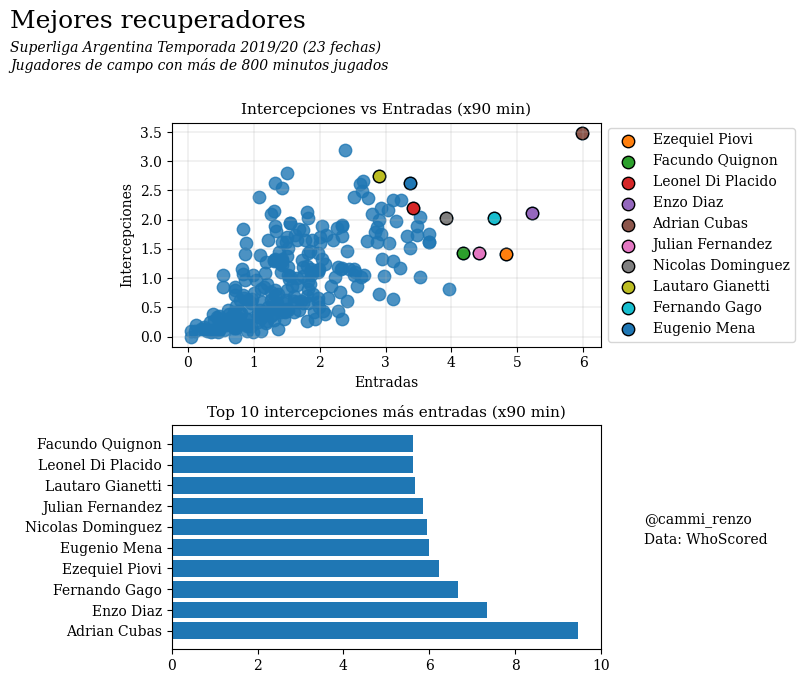

In [35]:
#PLOT DATA

#set plot style
plt.style.use('default')
    
#set font
plt.rcParams["font.family"] = "serif"

#create figure 
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=(8,6))

#first scatter plot
ax1.scatter(y=df['Int_sig'], x=df['Tackles_sig'], marker='o', s=80, alpha=0.8)

#sort the dataframe in order to highlight the top 10 defensive players and identify them by color 
top_10 = df[['Player','Int+Tack_sig']].sort_values(by='Int+Tack_sig',ascending=False)

n = df['Player'].unique()
n_top = top_10['Player'][0:10].unique()

for i, txt in enumerate(n):
    if txt in n_top:
        #ax1.annotate(txt, (df['Tackles_sig'].iloc[i], df['Int_sig'].iloc[i]))
        top = ax1.scatter(y=df['Int_sig'].iloc[i], x=df['Tackles_sig'].iloc[i], marker='o', s=80, alpha=1, label=txt, edgecolors='black')

#plot title of first plot
ax1.set_title('Intercepciones vs Entradas (x90 min)', fontsize=11)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.set_xlabel('Entradas')
ax1.set_ylabel('Intercepciones')
ax1.grid(linewidth=0.25)

#second bar plot with top 10 players
ax2.barh(top_10['Player'][0:10], top_10['Int+Tack_sig'][0:10])

#title second plot
ax2.set_title('Top 10 intercepciones más entradas (x90 min)', fontsize=11)
ax2.set_xlim(0,10)

#credits
ax2.annotate('@cammi_renzo',
            xy=(0.8, 0.25), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=10)

ax2.annotate('Data: WhoScored',
            xy=(0.8, 0.22), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=10)

#plot main title
plt.figtext(0,1.10,'Mejores recuperadores', fontsize=18, ha='left')
plt.figtext(0,1.06, 'Superliga Argentina Temporada 2019/20 (23 fechas)', fontsize=10, fontstyle='italic', ha='left')
plt.figtext(0,1.03, 'Jugadores de campo con más de 800 minutos jugados', fontsize=10, fontstyle='italic', ha='left')

#adjust subplots
fig.tight_layout()

#save fig
#plt.savefig('defensive.png', bbox_inches="tight")